# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import scipy.stats as stats
import pylab
import math
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

### Before we answer the questions above, let's take a quick look at the data

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ecffd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1164d1860>]], dtype=object)

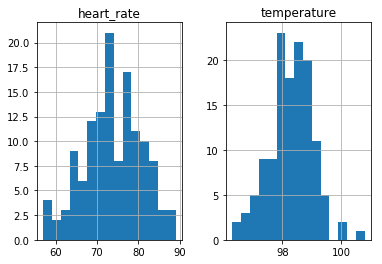

In [4]:
df.hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165eeba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11682d710>]], dtype=object)

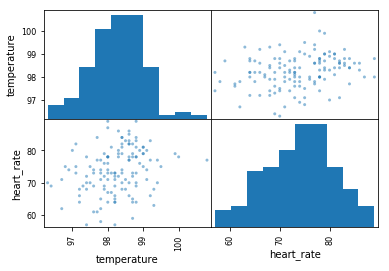

In [5]:
pd.plotting.scatter_matrix(df[['temperature', 'heart_rate']]) 

## 1) Is the distribution of body temperatures normal?

In [6]:
# We know these numeric values from the cell above
body_temp_mean = df['temperature'].mean()
body_temp_std = df['temperature'].std()

### Graphical methods:

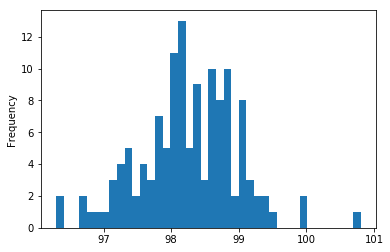

In [7]:
df.temperature.plot(kind='hist', bins=40)

A quick glance at the histogram shows a bell like curve with a mean around 98.

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

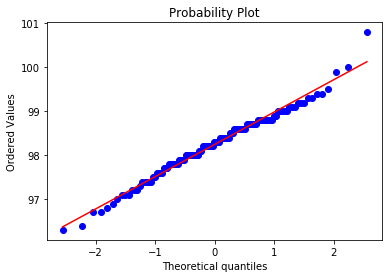

In [8]:
stats.probplot(df.temperature, dist="norm", plot=pylab)

A Q-Q plot of the temperature data tracks very well with the normal distribution (red line) which suggest the temperature data is normally distributed. 

### Hypothesis testing:

The Shapiro-Wilk tests the null hypothesis that the data was drawn from a normal distribution.

In [9]:
shapiro_wilk = stats.shapiro(df.temperature)
shapiro_wilk # in a tuple (test statistic, p-value)

(0.9865770936012268, 0.233174666762352)

With a p-value of the 0.22 we can safely refect the null hypothesis

## 2) Is the sample size large and are the observations independant? 

The sample size of 130 is large enough for the CLT. A general rule of thumb is to have 20 samples per category. We currently have almost double that. 
The observations are independent as we're taking the temperature of individuals.

## 3) Is the true population mean 98.6 degrees fahrenheit?

Since we only want to know if the population mean equals 98.6, and don't care if it's lower or higher, we can use the one-sample test. 

The t-statistic is generally used when you do not know the population's standard deviation, or when you have a small sample size (less than 30). The t-statistic also approximates the z statistic. We'll perform both the z and t test below and see how they compare. 

We'll use the null hypothesis h0: the sample mean is the same as the population mean given (98.6 degrees fahrenheit). The alternative hypothesis, or h1, would be that the sample mean temperature is not 98.6. 

In [10]:
t_test_1samp = stats.ttest_1samp(df.temperature, 98.6)
t_test_1samp

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

A negative t statistic would indicate that the sample mean is less than the observed mean and is evidence against the null hypothesis. The p-value associated with the test is very far below .05, so we reject the null hypothesis in favor of the alternative hypothesis which is the mean is not equal to 98.6

In [11]:
#z_test = stats.zscore(df.temperature)
#z_test

## 4) At what temperature should we consider someones temperature to be abnormal?
We'll start by computing the confidence intervals and margin of error.

In [12]:
z = 1.96
second_term = z * (body_temp_std / math.sqrt(df.shape[0]))
confidence_interval = (body_temp_mean + second_term, body_temp_mean - second_term)
confidence_interval

(98.37526742623304, 98.12319411222852)

Margin of error at 95% confidence for our sample can be approximated as 0.98/sqrt(130) = 0.98/11.4 = 0.086 or 8.6%

## 5) 

In [20]:
f_temp = df[df.gender == 'F']
m_temp = df[df.gender == 'M']
f_temp.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [17]:
m_temp.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [22]:
f_t_test = stats.ttest_1samp(f_temp.temperature, 98.6)
f_t_test

Ttest_1sampResult(statistic=-2.2354980796784965, pvalue=0.028880450789682037)

In [24]:
m_t_test = stats.ttest_1samp(m_temp.temperature, 98.6)
m_t_test

Ttest_1sampResult(statistic=-5.7157574493186907, pvalue=3.083840317313081e-07)